## Data Loading and Exploration:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
dt=pd.read_csv('housing.csv')

In [3]:
dt.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
dt.shape #returns the number of rows and columns

(20640, 10)

In [5]:
dt.size # returns the total number of elements

206400

In [6]:
dt.info() #gets information about the DataFrame, including column names, non-null counts, and data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
dt.describe() #Obtains summary statistics of numeric columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Data Cleaning:

### Handling missing values:

In [8]:
dt.isnull().sum() #counts of missing values per column 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
dt.isnull().sum() / len(dt) * 100  # missing_value_percentage

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

### Data Cleaning:

In [10]:
df=dt.dropna() #removing missing (NaN) values

In [11]:
df.isnull().sum().sum() #the sum of all missing values across all column

0

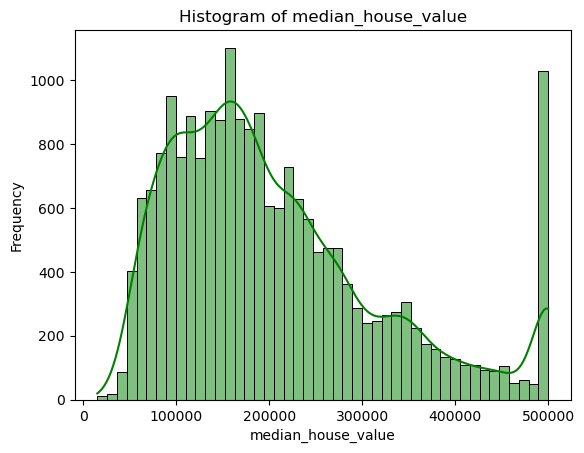

In [12]:
sns.histplot(df['median_house_value'],color='green', edgecolor='black',kde=True)
plt.title('Histogram of median_house_value')
plt.xlabel('median_house_value')
plt.ylabel('Frequency')
plt.show()

## Handling Outliers

In [13]:
# Using IQR method to remove outliers

Q1 = df['median_house_value'].quantile(0.25) # First quartile

Q3 = df['median_house_value'].quantile(0.75)  # Third quartile

IQR = Q3 - Q1  # Interquartile range
    

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    
#df2---data without outlier
df2 = df[(df['median_house_value'] >= lower_bound) & (df['median_house_value'] <= upper_bound)]

print("Q1:", Q1)
print("Q3:", Q3)

Q1: 119500.0
Q3: 264700.0


In [14]:
df2.shape #new data shape without outliers

(19369, 10)

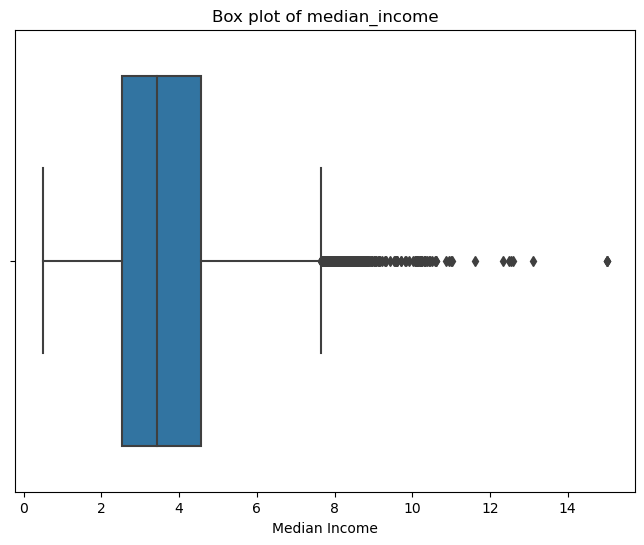

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2['median_income'])
plt.title('Box plot of median_income')
plt.xlabel('Median Income')
plt.show()


In [16]:
Q1 = df2['median_income'].quantile(0.25) # First quartile

Q3 = df2['median_income'].quantile(0.75)  # Third quartile

IQR = Q3 - Q1  # Interquartile range
    
# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    
#data---data without outlier
data = df2[(df2['median_income'] >= lower_bound) & (df2['median_income'] <= upper_bound)]
data.shape

(19026, 10)

## Correlation Analysis

### Correlations between 'median_house_value' and other numeric columns

In [17]:
target_column = 'median_house_value' 

# Create an empty dictionary to store correlations
correlations = {}

# Iterate through all columns (excluding the target column)
for column in data.columns:
    if column != target_column:
        if data[column].dtype in [float, int]:
            correlation = data[target_column].corr(data[column])
            correlations[column] = correlation

# Convert the dictionary to a DataFrame for easier analysis and visualization
correlations_data = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])

# Sort the DataFrame by correlation values (optional)
correlations_data = correlations_data.sort_values(by='Correlation', ascending=True)

# Print or analyze the correlations
print(correlations_data)

                    Correlation
latitude              -0.151486
longitude             -0.049612
population             0.017611
total_bedrooms         0.085587
housing_median_age     0.086226
households             0.104822
total_rooms            0.137017
median_income          0.616466


### 'median_income' appears to be the most strongly correlated feature with 'median_house_value'

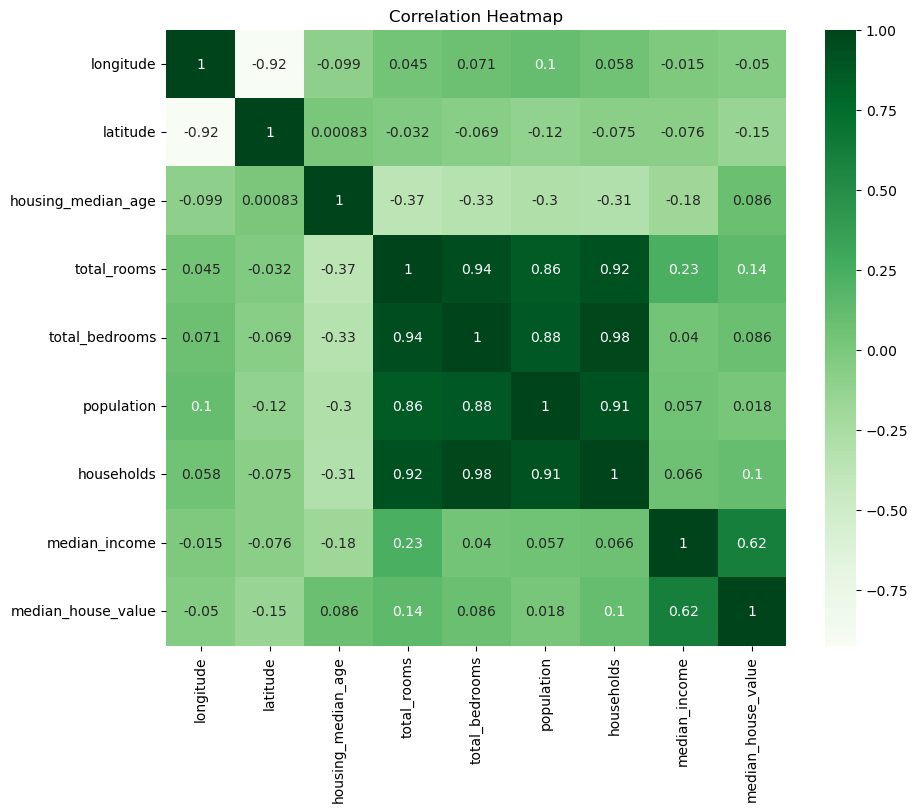

In [18]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,cmap='Greens')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
dt['ocean_proximity'].unique() #Checks unique values in the 'ocean_proximity'

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [20]:
encoded_data = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity')
data=pd.concat([data.drop('ocean_proximity',axis=1),encoded_data],axis=1)
encoded_data  #one-hot encoding to convert the categorical variable ocean_proximity into numerical features

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
5,False,False,False,True,False
6,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [21]:
data.columns   # additional columns are created to represent each category as binary features. 

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

## Splitting Data:

In [22]:
independent_variable=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']

dependent_variable=['median_house_value']

X=data[independent_variable]
y=data[dependent_variable]

## Model Training:

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1111)
model = LinearRegression()
model.fit(X_train, y_train) #Model Fitting

LinearRegression()

In [24]:
## Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([[164400.],
       [196400.],
       [ 65200.],
       ...,
       [142000.],
       [200600.],
       [129500.]])

## Model Evaluation

In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [26]:
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 4.94291698590381e-20
R-squared (R2) Score: 1.0


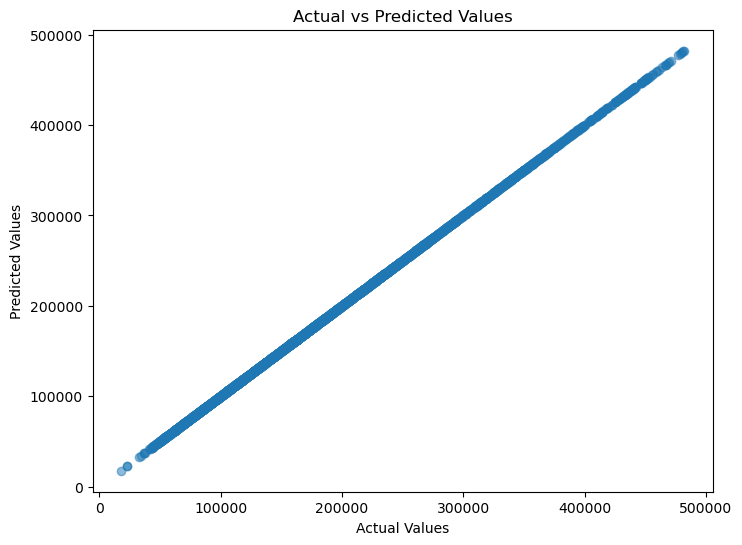

In [27]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

## Residuals Analysis

In [28]:
residuals = y_test - y_pred


mean_residuals = residuals.mean()
std_residuals = residuals.std()
skewness_residuals = residuals.skew()
kurtosis_residuals = residuals.kurtosis()

# Print Descriptive Statistics
print("Mean of Residuals:", mean_residuals)
print("Standard Deviation of Residuals:", std_residuals)
print("Skewness of Residuals:", skewness_residuals)
print("Kurtosis of Residuals:", kurtosis_residuals)

Mean of Residuals: median_house_value   -1.996205e-11
dtype: float64
Standard Deviation of Residuals: median_house_value    2.214578e-10
dtype: float64
Skewness of Residuals: median_house_value    0
dtype: int64
Kurtosis of Residuals: median_house_value    0
dtype: int64


### The residuals resulting from the linear regression model have a nearly normal distribution, with very little bias, low variability, and symmetric tails. 

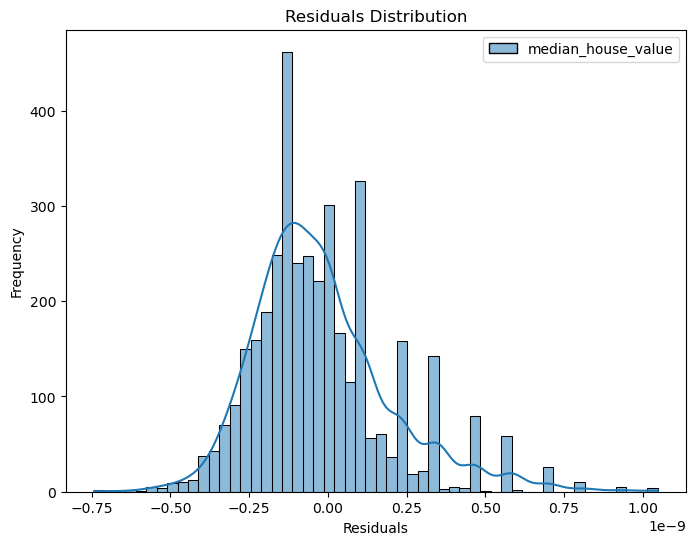

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [30]:
# Instantiate the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R-squared (R2) Score:", r2_rf)

/Users/hunter/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest - Mean Squared Error: 5127.566817288492
Random Forest - R-squared (R2) Score: 0.9999994224692942


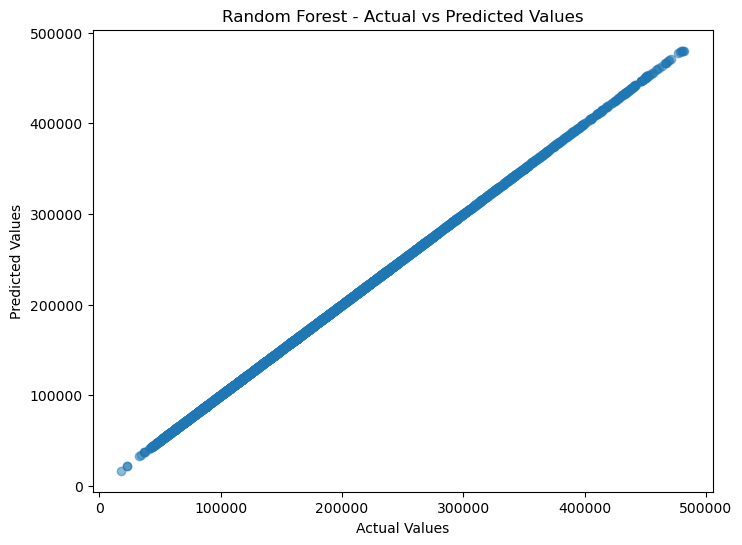

In [31]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest - Actual vs Predicted Values")
plt.show()

### Our analysis and modeling efforts have successfully explored the housing dataset, identified patterns, and built predictive models to estimate housing prices. Both Linear Regression and Random Forest Regression models performed exceptionally well, with Random Forest slightly outperforming Linear Regression.